### Build a multiple linear regression model for the prediction of demand for shared bikes

##### Below are the steps performed to model MLR

1. Reading and Understanding the Data
2. Visualising the Data
3. Data Pre Preparation
4. Building a Linear Model
5. Making Predictions Using the Final Model
6. Model Evaluation

# 1. Reading and Understanding the Data

## Step 1: Reading and Understanding the Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
bikes = pd.read_csv("day.csv")

In [4]:
print(bikes.shape)
bikes.head()

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### Replace value with name

In [7]:
bikes['season'] = bikes['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [8]:
bikes['weathersit'] = bikes['weathersit'].map({1:'Clear',2:'Cloudy',3:'Light Rain',4:'Heavy Rain'})
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# 2. Visualising the Data

## Step 1 : Numeric Variable Visualising

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

##### Visualising Numeric Variables using scatter plot chart

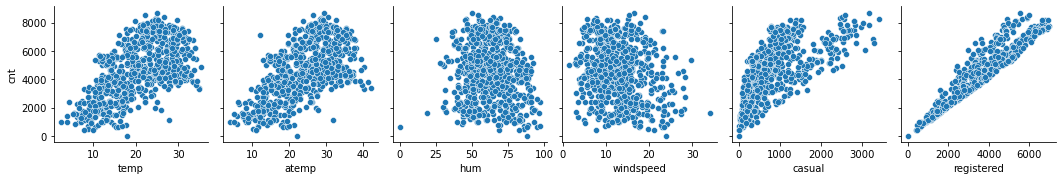

In [11]:
sns.pairplot(bikes,  x_vars=['temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered'], y_vars=['cnt'],  kind='scatter')

plt.show()

## Step 2 : Carogorical Variables Visualising

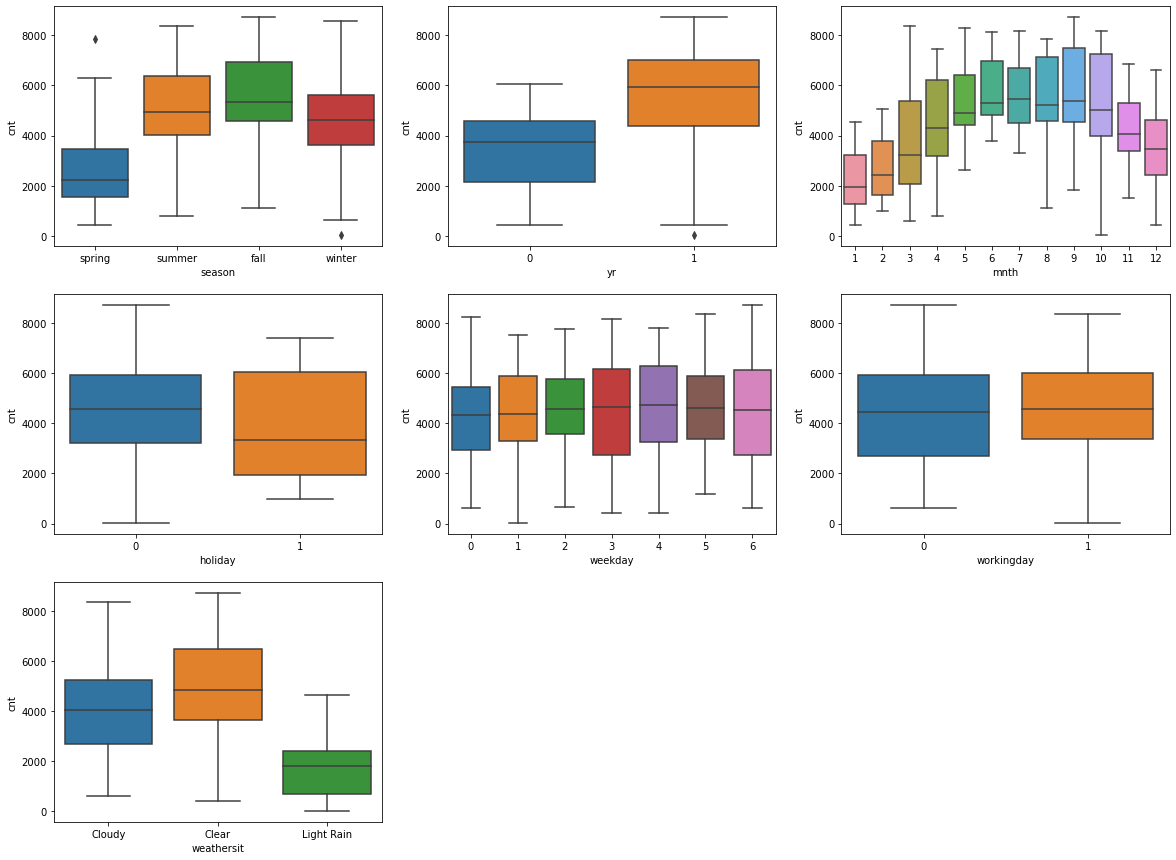

In [12]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.show()

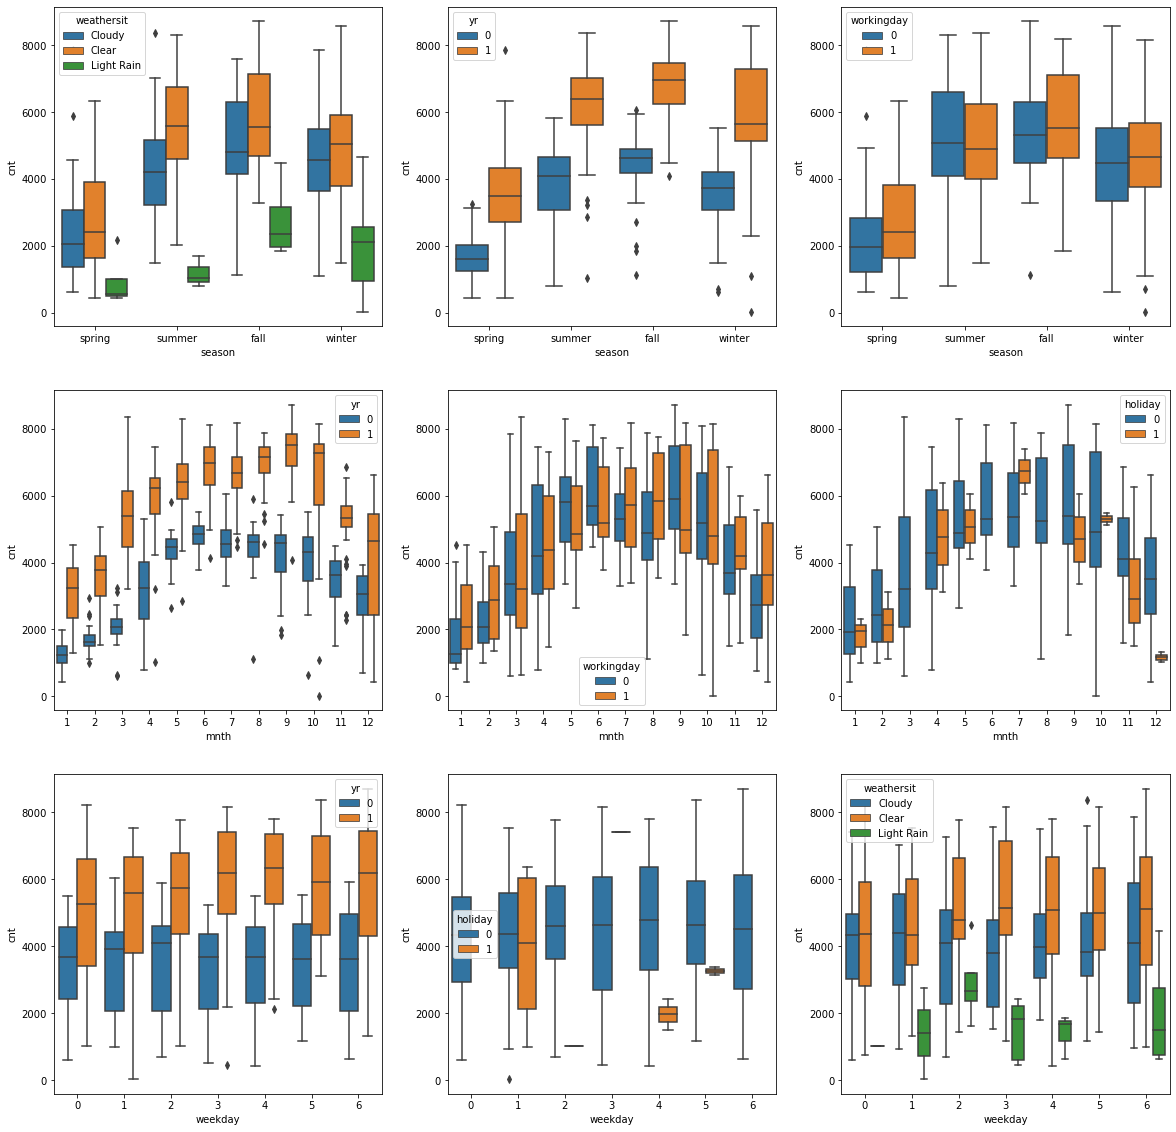

In [13]:
plt.figure(figsize = (20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = bikes)
plt.subplot(3,3,2)
sns.boxplot(x = 'season', y = 'cnt', hue = 'yr', data = bikes)
plt.subplot(3,3,3)
sns.boxplot(x = 'season', y = 'cnt', hue = 'workingday', data = bikes)

plt.subplot(3,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'yr', data = bikes)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'workingday', data = bikes)
plt.subplot(3,3,6)
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'holiday', data = bikes)

plt.subplot(3,3,7)
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'yr', data = bikes)
plt.subplot(3,3,8)
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'holiday', data = bikes)
plt.subplot(3,3,9)
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'weathersit', data = bikes)

plt.show()

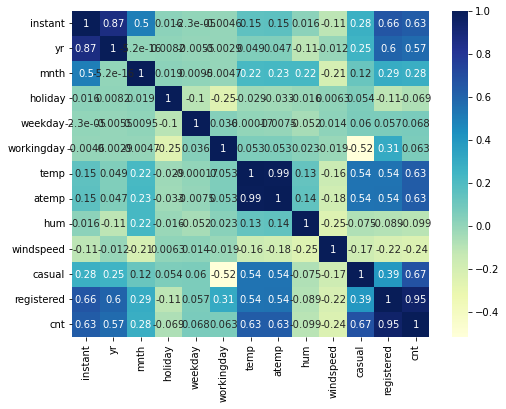

In [14]:
plt.figure(figsize = (8, 6))
sns.heatmap(bikes[bikes.columns].corr(), annot = True, cmap="YlGnBu")
plt.show()

# 3. Data Pre Preparation

## Step 1 : Convert catagorical variable to dummy variable

In [15]:
bikes['mnth'] = bikes['mnth'].map({1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [16]:
bikes['weekday'] = bikes['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Get Dummy Variables

##### `Season` Dummies Variable
- `100` : spring
- `010` : summer
- `000` : fall
- `001` : winter

In [17]:
dummies = pd.get_dummies(bikes['season'], drop_first = True)
dummies.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [18]:
bikes = pd.concat([bikes, dummies], axis = 1)

In [19]:
bikes.drop(['season'], axis=1, inplace=True)
bikes.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,1,01-01-2018,0,Jan,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,2,02-01-2018,0,Jan,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,3,03-01-2018,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


##### `weathersit` Dummies Variable
- `10` : Cloudy
- `01` : Light Rain
- `00` : Clear
- `Not value found in dataset` : Heavy Rain

In [20]:
dummies = pd.get_dummies(bikes['weathersit'], drop_first = True)
dummies.head()

,Cloudy,Light Rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [21]:
bikes = pd.concat([bikes, dummies], axis=1)

In [22]:
bikes.drop(['weathersit'], axis=1, inplace=True)
bikes.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,Cloudy,Light Rain
0,1,01-01-2018,0,Jan,0,Saturday,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,1,0
1,2,02-01-2018,0,Jan,0,Sunday,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,1,0
2,3,03-01-2018,0,Jan,0,Monday,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,4,04-01-2018,0,Jan,0,Tuesday,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,5,05-01-2018,0,Jan,0,Wednesday,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0


##### `mnth` Dummies Variable
- `100000000000` : Jan

to

- `000000000001` : Dec

In [23]:
dummies = pd.get_dummies(bikes['mnth'], drop_first = True)
dummies.head()

,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [24]:
bikes = pd.concat([bikes, dummies], axis=1)

In [25]:
bikes.drop(['mnth'], axis=1, inplace=True)
bikes.head()

,instant,dteday,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,...,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sep
0,1,01-01-2018,0,0,Saturday,0,14.110847,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,2,02-01-2018,0,0,Sunday,0,14.902598,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,0,0,Monday,1,8.050924,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,0,0,Tuesday,1,8.200000,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,5,05-01-2018,0,0,Wednesday,1,9.305237,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


##### `weekday` Dummies Variable
- `1000000` : Sun

to

- `0000001` : Sat

In [26]:
dummies = pd.get_dummies(bikes['weekday'], drop_first = True)
dummies.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [27]:
bikes = pd.concat([bikes, dummies], axis=1)

In [28]:
bikes.drop(['weekday'], axis=1, inplace=True)
bikes.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,0,1,0,0,0,0
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,1,0,0,0
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,0,0,1,0
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,0,0,1


#### Removing instant (Record Index) column as it is the `index` of record.
#### This variable is not require in model building

In [29]:
bikes.drop(['instant'],axis=1, inplace=True)

#### As per "Data Preparation" section: casual & registered column's sum is `cnt` (target variable)

In [30]:
bikes.drop(['casual','registered'],axis=1, inplace=True)

In [31]:
print(bikes.columns.value_counts().sum())
bikes.columns

31


Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'Cloudy',
       'Light Rain', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'March',
       'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday'],
      dtype='object')

In [32]:
bikes.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 2 : Splitting the Data into Training and Testing Sets

In [33]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [34]:
print(bikes.shape)
print(df_train.shape)
print(df_test.shape)

(730, 31)
(510, 31)
(219, 31)


## Step 2 : Rescalling the features

Using MinMaxScaler techinique to rescale variable at comparable scale.

Basically I am generalizing the data points so distance between them will be lower

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [38]:
df_train.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,16-10-2019,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,...,0,0,1,0,0,0,0,0,1,0
576,31-07-2019,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,...,0,0,0,0,0,0,0,0,1,0
426,03-03-2019,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,...,0,0,0,0,0,1,0,0,0,0
728,30-12-2019,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,...,0,0,0,0,0,0,1,0,0,0
482,28-04-2019,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,...,0,0,0,0,0,1,0,0,0,0


In [39]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


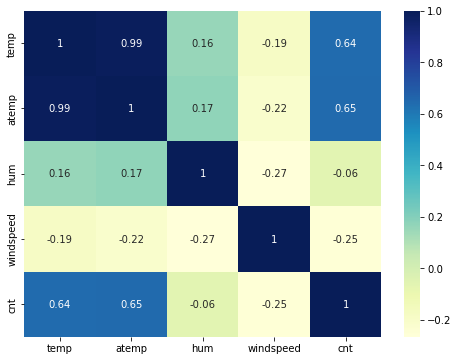

In [40]:
plt.figure(figsize = (8, 6))
sns.heatmap(df_train[num_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()

**Note:**
- temp and atemp have high correlation

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      510 non-null    object 
 1   yr          510 non-null    int64  
 2   holiday     510 non-null    int64  
 3   workingday  510 non-null    int64  
 4   temp        510 non-null    float64
 5   atemp       510 non-null    float64
 6   hum         510 non-null    float64
 7   windspeed   510 non-null    float64
 8   cnt         510 non-null    float64
 9   spring      510 non-null    uint8  
 10  summer      510 non-null    uint8  
 11  winter      510 non-null    uint8  
 12  Cloudy      510 non-null    uint8  
 13  Light Rain  510 non-null    uint8  
 14  Aug         510 non-null    uint8  
 15  Dec         510 non-null    uint8  
 16  Feb         510 non-null    uint8  
 17  Jan         510 non-null    uint8  
 18  July        510 non-null    uint8  
 19  June        510 non-null    

In [42]:
# All categorical variables in the dataset
df_train_corr=df_train.select_dtypes(include=['uint8'])
print(df_train_corr.columns)

Index(['spring', 'summer', 'winter', 'Cloudy', 'Light Rain', 'Aug', 'Dec',
       'Feb', 'Jan', 'July', 'June', 'March', 'May', 'Nov', 'Oct', 'Sep',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')


In [43]:
# All categorical variables in the dataset
df_train_corr=df_train.select_dtypes(include=['int64','object'])
print(df_train_corr.columns)

Index(['dteday', 'yr', 'holiday', 'workingday'], dtype='object')


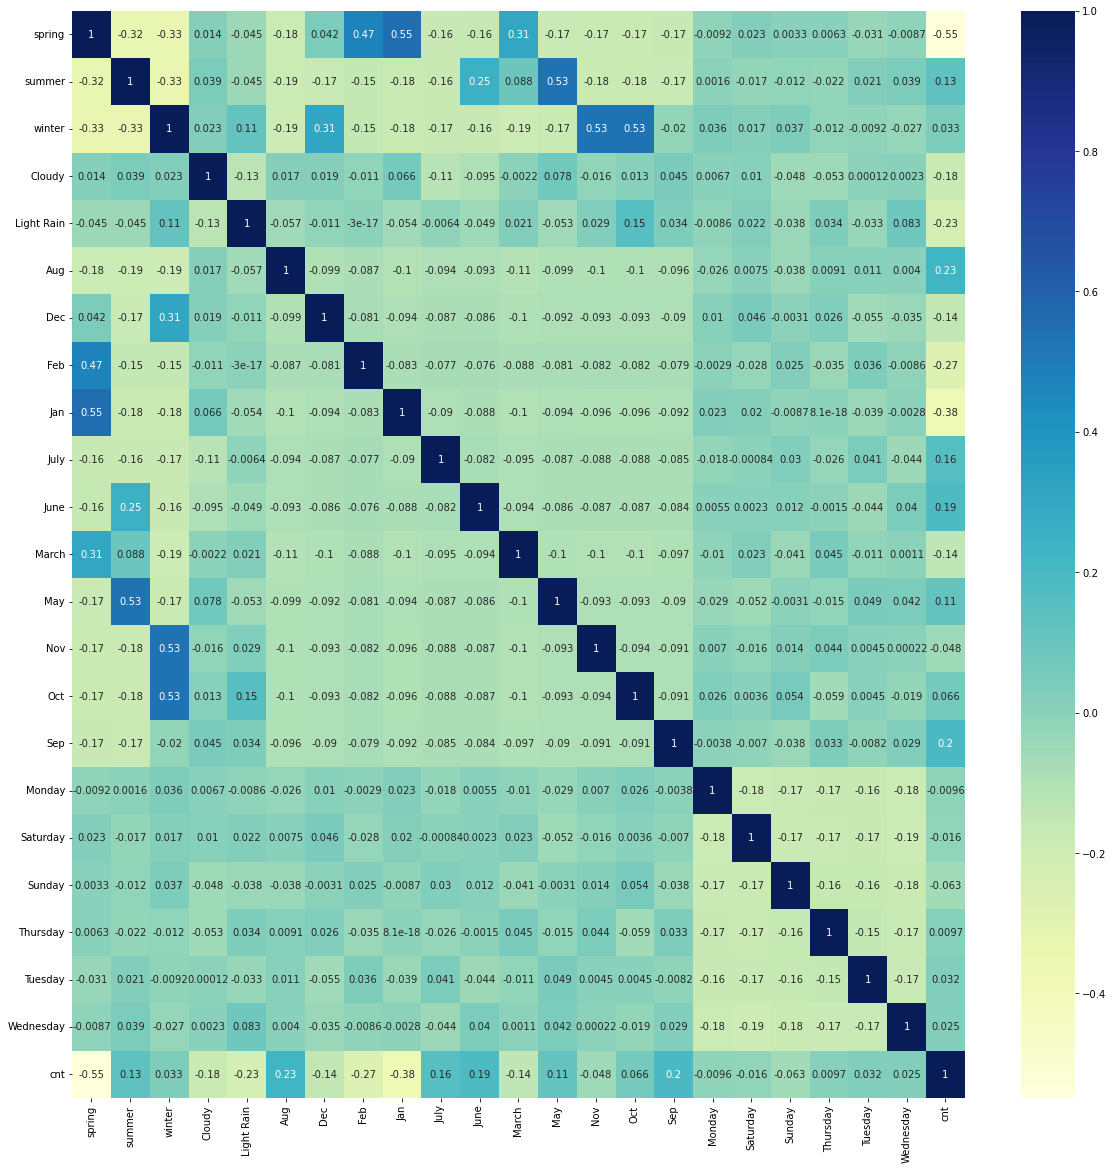

In [44]:
plt.figure(figsize = (20, 20))
sns.heatmap(df_train[['spring', 'summer', 'winter', 'Cloudy', 'Light Rain', 'Aug', 'Dec',
       'Feb', 'Jan', 'July', 'June', 'March', 'May', 'Nov', 'Oct', 'Sep',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'cnt']].corr(), annot = True, cmap="YlGnBu")
plt.show()

**Note:**
- Jan, Feb <--> spring have high correlation
- May <--> summer have high correlation
- Oct , Nov <--> winter have high correlation

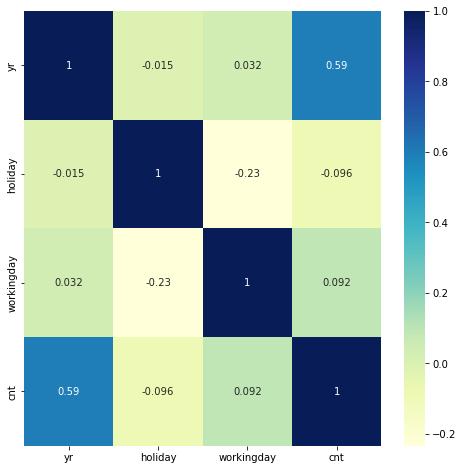

In [45]:
plt.figure(figsize = (8, 8))
sns.heatmap(df_train[['dteday', 'yr', 'holiday', 'workingday', 'cnt']].corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Devide traning set into X and y raining set

In [46]:
y_train = df_train.pop('cnt') # 'cnt' is target variable, Popping into y_train
X_train = df_train

# 4. Building a Linear Model

### Step 1 : Build Model by taking feature manually

Fit a regression line through the training data using `statsmodels`. I need to explicitly fit a constant using `sm.add_constant(X)` because if I don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

Taking `atemp` as a first argument to build model as correlation value is high with target variabe

In [47]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [48]:
# Check the parameters obtained
lr.params

const    0.162924
atemp    0.683633
dtype: float64

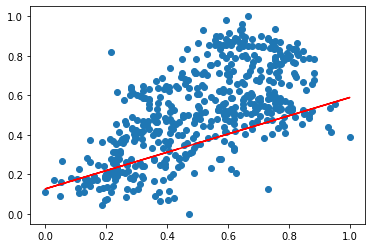

In [49]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [50]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           1.10e-61
Time:                        22:37:24   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

### Adding another variable

The R-squared value obtained is `0.418`.

Since we have many other than variables, whose correlation can be considered to model.

let's take the second most highly correlated variable, i.e. `temp`.

In [51]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp', 'temp']]

In [52]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.163383
atemp    0.492316
temp     0.181818
dtype: float64

In [53]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           1.95e-60
Time:                        22:37:24   Log-Likelihood:                 176.81
No. Observations:                 510   AIC:                            -347.6
Df Residuals:                     507   BIC:                            -334.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1634      0.020      8.215      0.0

#### As observed in corr() heatmap chart `atemp` and `temp` are having high value of correlation. We will face multicollinearity if we use both.

As seen above R-squared value, adding `temp` column do not add any value in model.

Also p-value of `temp` shows less significant in model.

Hence removing it from model building considerations


let's take the next most highly correlated variable, i.e. `yr`.

In [54]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp', 'yr']]

In [55]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

lr_2.params

const    0.072104
atemp    0.625241
yr       0.237817
dtype: float64

In [56]:
# Print the summary of the model

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     579.5
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.07e-131
Time:                        22:37:25   Log-Likelihood:                 341.87
No. Observations:                 510   AIC:                            -677.7
Df Residuals:                     507   BIC:                            -665.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.015      4.810      0.0

- We have improved R-suqared value to `0.696` by adding `yr` variable

### Step 2 : Add all variables & Remove less significant

In [57]:
X_train.columns

Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'spring', 'summer', 'winter', 'Cloudy', 'Light Rain',
       'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'March', 'May', 'Nov',
       'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [58]:
# Assign all the feature variables to X
X_train_lm = X_train[['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'spring', 'summer', 'winter', 'Cloudy', 'Light Rain',
       'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'March', 'May', 'Nov',
       'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday']]

In [59]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

In [60]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          8.42e-181
Time:                        22:37:25   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2452      0.035      6.953      0.0

# Remove  `mnth` variable as p-value is high, is less significant

- Drop variable with high p-value > 0.50

In [61]:
# Drop as very high p-value
X_train_lm.drop(['holiday','Aug','June','March','Oct','Thursday','Wednesday'], axis=1, inplace=True)

In [62]:
# Drop varable which have high correlation as per heatmap
X_train_lm.drop(['atemp','Jan','Feb','May','Nov'], axis=1, inplace=True)

In [63]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [64]:
# Print the summary of the model

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.9
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          5.98e-189
Time:                        22:37:26   Log-Likelihood:                 519.53
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     492   BIC:                            -926.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1934      0.043      4.485      0.0

##### Drop Another variable with high p-value

In [65]:
X_train_lm.drop(['Dec','Monday','Dec','Tuesday'], axis=1, inplace=True)

In [66]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [67]:
# Print the summary of the model

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.13e-191
Time:                        22:37:26   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1799      0.042      4.276      0.0

## Step 3 : Checking VIF

In [68]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
# Self Practice Code
X_train_lm.shape

(510, 15)

In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,114.08
2,workingday,9.07
13,Saturday,6.06
14,Sunday,5.74
6,spring,5.02
3,temp,3.62
8,winter,3.49
7,summer,2.61
4,hum,1.91
9,Cloudy,1.57


##### Drop Another variable with high VIF value > 5

In [71]:
X_train_lm.drop(['workingday'], axis=1, inplace=True)

In [72]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [73]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.8
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.36e-189
Time:                        22:37:26   Log-Likelihood:                 509.56
No. Observations:                 510   AIC:                            -991.1
Df Residuals:                     496   BIC:                            -931.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2797      0.035      8.080      0.0

##### Drop Another variable with high p-value

In [74]:
X_train_lm.drop(['Saturday'], axis=1, inplace=True)

In [75]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [76]:
# Print the summary of the model

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.5
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          3.31e-190
Time:                        22:37:27   Log-Likelihood:                 508.78
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     497   BIC:                            -936.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2833      0.035      8.208      0.0

In [77]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.37
5,spring,5.01
2,temp,3.61
7,winter,3.49
6,summer,2.61
3,hum,1.91
8,Cloudy,1.57
10,July,1.49
11,Sep,1.29
9,Light Rain,1.25


##### Dropping spring because of hgh VIF > 5

In [78]:
X_train_lm.drop(['spring'], axis=1, inplace=True)

In [79]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [80]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          9.40e-190
Time:                        22:37:27   Log-Likelihood:                 504.87
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     498   BIC:                            -934.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2231      0.027      8.262      0.0

In [81]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.92
3,hum,1.88
2,temp,1.60
7,Cloudy,1.56
9,July,1.43
5,summer,1.33
6,winter,1.29
8,Light Rain,1.24
10,Sep,1.19
4,windspeed,1.18


## Step 4 : Residual Analysis of the train data

In [82]:
y_train_price = lr_5.predict(X_train_lm)

Text(0.5, 0, 'Errors')

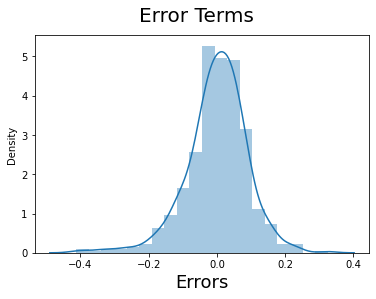

In [83]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [84]:
X_train_lm.head()

,const,yr,temp,hum,windspeed,summer,winter,Cloudy,Light Rain,July,Sep,Sunday
653,1.0,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0
576,1.0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0
426,1.0,1,0.442393,0.640189,0.255342,0,0,1,0,0,0,0
728,1.0,1,0.245101,0.498067,0.663106,0,0,0,0,0,0,1
482,1.0,1,0.395666,0.504508,0.188475,1,0,1,0,0,0,0


In [85]:
X_train_lm.columns

Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'summer', 'winter', 'Cloudy',
       'Light Rain', 'July', 'Sep', 'Sunday'],
      dtype='object')

## 5. Making Predictions Using the Final Model

In [86]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [87]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Dividing into X_test and y_test

In [88]:
y_test = df_test.pop('cnt')
X_test = df_test

In [89]:
# Adding constant variable to test dataframe
X_test_m5 = sm.add_constant(X_test)

In [90]:
X_test_m5.head()

,const,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,1.0,04-07-2018,0,1,0,0.831783,0.769660,0.657364,0.084219,0,...,0,0,0,0,1,0,0,0,0,0
535,1.0,20-06-2019,1,0,1,0.901354,0.842587,0.610133,0.153728,0,...,0,0,0,0,0,0,0,0,0,1
299,1.0,27-10-2018,0,0,1,0.511964,0.496145,0.837699,0.334206,0,...,0,0,1,0,0,0,0,1,0,0
221,1.0,10-08-2018,0,0,1,0.881625,0.795343,0.437098,0.339570,0,...,0,0,0,0,0,0,0,0,0,1
152,1.0,02-06-2018,0,0,1,0.817246,0.741471,0.314298,0.537414,0,...,0,0,0,0,0,0,0,1,0,0


In [91]:
# Creating X_test_m5 dataframe by dropping variables from X_test_m5

X_test_m5 = X_test_m5[['const','yr', 'temp', 'hum', 'windspeed', 'summer', 'winter', 'Cloudy','Light Rain', 'July', 'Sep', 'Sunday']]
X_test_m5.columns

Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'summer', 'winter', 'Cloudy',
       'Light Rain', 'July', 'Sep', 'Sunday'],
      dtype='object')

In [92]:
X_test_m5.head()

,const,yr,temp,hum,windspeed,summer,winter,Cloudy,Light Rain,July,Sep,Sunday
184,1.0,0,0.831783,0.657364,0.084219,0,0,1,0,1,0,0
535,1.0,1,0.901354,0.610133,0.153728,1,0,0,0,0,0,0
299,1.0,0,0.511964,0.837699,0.334206,0,1,1,0,0,0,0
221,1.0,0,0.881625,0.437098,0.339570,0,0,0,0,0,0,0
152,1.0,0,0.817246,0.314298,0.537414,1,0,0,0,0,0,0


In [93]:
# Making predictions using the fifth model

y_pred_m5 = lr_5.predict(X_test_m5)

## 6 : Model Evaluation

Text(0, 0.5, 'y_pred')

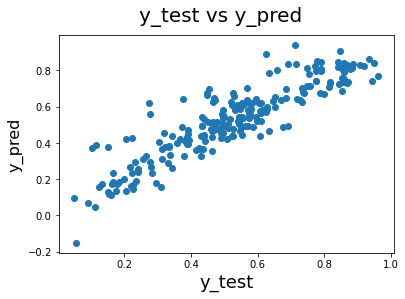

In [94]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

# Final prediction on test dataset

In [95]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m5)

0.8033850605733447